In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Memuat data pelatihan (berisi informasi harga dari beberapa tempat belanja)
price = np.array([[1, 2, 3, 1], [1, 2, 3, 8], [5, 3, 4, 2], [6, 2, 5, 8], [1, 8, 2, 9], [6,8,3,9], [9,2,6,9], [7,1,8,9], [4,7,2,9], [9,5,8,9]], dtype=int)
cheapest_store = np.array([['Store_D'], ['Store_C'], ['Store_D'], ['Store_B'], ['Store_A'], ['Store_C'], ['Store_B'], ['Store_B'], ['Store_C'], ['Store_B']], dtype=str)

# Menyiapkan fitur dan label untuk model
features = price
labels = cheapest_store.flatten()

# Normalisasi fitur
features = (features - features.mean()) / features.std()

# One-hot encode the categorical labels
labels = pd.get_dummies(labels)

print(features)
print(labels)

[[-1.39678394 -1.0602095  -0.72363505 -1.39678394]
 [-1.39678394 -1.0602095  -0.72363505  0.95923717]
 [-0.05048617 -0.72363505 -0.38706061 -1.0602095 ]
 [ 0.28608828 -1.0602095  -0.05048617  0.95923717]
 [-1.39678394  0.95923717 -1.0602095   1.29581161]
 [ 0.28608828  0.95923717 -0.72363505  1.29581161]
 [ 1.29581161 -1.0602095   0.28608828  1.29581161]
 [ 0.62266272 -1.39678394  0.95923717  1.29581161]
 [-0.38706061  0.62266272 -1.0602095   1.29581161]
 [ 1.29581161 -0.05048617  0.95923717  1.29581161]]
   Store_A  Store_B  Store_C  Store_D
0    False    False    False     True
1    False    False     True    False
2    False    False    False     True
3    False     True    False    False
4     True    False    False    False
5    False    False     True    False
6    False     True    False    False
7    False     True    False    False
8    False    False     True    False
9    False     True    False    False


In [3]:
# Membagi data menjadi data pelatihan dan data validasi
train_size = int(0.8 * len(features))
train_features = features[:train_size]
train_labels = labels[:train_size]
val_features = features[train_size:]
val_labels = labels[train_size:]

In [4]:
# Membangun model menggunakan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(labels.shape[1], activation='softmax')
])

In [5]:
# Mengkompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Melatih model
history = model.fit(train_features, train_labels, epochs=50, batch_size=3, validation_data=(val_features, val_labels))

Epoch 1/500
3/3 [==============================] - 0s 37ms/step - loss: 2.2218e-04 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 2.2164e-04 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 2.2097e-04 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 1.0000
Epoch 4/500
3/3 [==============================] - 0s 16ms/step - loss: 2.2033e-04 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 1.0000
Epoch 5/500
3/3 [==============================] - 0s 15ms/step - loss: 2.1986e-04 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 1.0000
Epoch 6/500
3/3 [==============================] - 0s 19ms/step - loss: 2.1923e-04 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 2.1865e-04 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy:

In [25]:
# Menggunakan model untuk memberikan rekomendasi tempat belanja per item
def get_cheapest_stores(features):
    normalized_features = (np.array(features) - np.mean(features)) / np.std(features)
    price_predictions = model.predict(normalized_features.reshape(1, -1))
    cheapest_store_index = np.argmax(price_predictions)
    return labels.columns[cheapest_store_index]

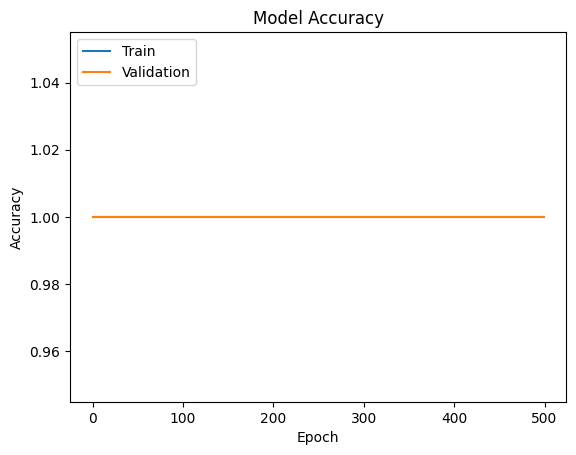

In [26]:
# Memplot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

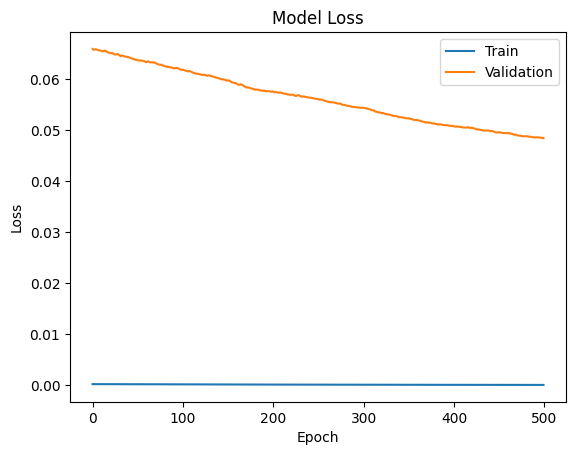

In [27]:
# Memplot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
# Contoh penggunaan
user_features = [19124, 19125, 19126, 19123]  # Contoh fitur harga item dari pengguna
cheapest_stores = get_cheapest_stores(user_features)
print(f"Rekomendasi tempat belanja dengan harga termurah per item: {cheapest_stores}")

1/1 [==============================] - 0s 29ms/step
Rekomendasi tempat belanja dengan harga termurah per item: Store_D
